<a href="https://colab.research.google.com/github/SriAmbica11/github-final-project/blob/main/Copy_of_Sangineedi_SriAmbica_Assignment_05ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [ ]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
for enc in encodings:
    try:
        train_df = pd.read_csv('train.csv', encoding=enc)
        print(f"Loaded train.csv with encoding={enc}")
        break
    except UnicodeDecodeError:
        continue
else:
    raise ValueError("Failed to read train.csv with tried encodings")

for enc in encodings:
    try:
        test_df = pd.read_csv('test.csv', encoding=enc)
        print(f"Loaded test.csv with encoding={enc}")
        break
    except UnicodeDecodeError:
        continue
else:
    raise ValueError("Failed to read test.csv with tried encodings")

Loaded train.csv with encoding=latin1
Loaded test.csv with encoding=latin1


In [ ]:
# Cell 4: Display the first few rows of the train dataset
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
# Cell 5: Check for null values in train dataset
print("Null values in train dataset:")
print(train_df.isnull().sum())

Null values in train dataset:
textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64


In [ ]:
# Cell 7: Drop rows with null values in train dataset
train_df_clean = train_df.dropna()
print("Original train dataset shape:", train_df.shape)
print("Clean train dataset shape:", train_df_clean.shape)
print("Number of rows dropped:", train_df.shape[0] - train_df_clean.shape[0])

Original train dataset shape: (27481, 10)
Clean train dataset shape: (27480, 10)
Number of rows dropped: 1


In [ ]:
# Cell 8: Drop rows with null values in test dataset
test_df_clean = test_df.dropna()
print("Original test dataset shape:", test_df.shape)
print("Clean test dataset shape:", test_df_clean.shape)
print("Number of rows dropped:", test_df.shape[0] - test_df_clean.shape[0])

Original test dataset shape: (4815, 9)
Clean test dataset shape: (3534, 9)
Number of rows dropped: 1281


In [ ]:
# Cell 9: Save the cleaned datasets
train_df_clean.to_csv('train_clean.csv', index=False)
test_df_clean.to_csv('test_clean.csv', index=False)

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64


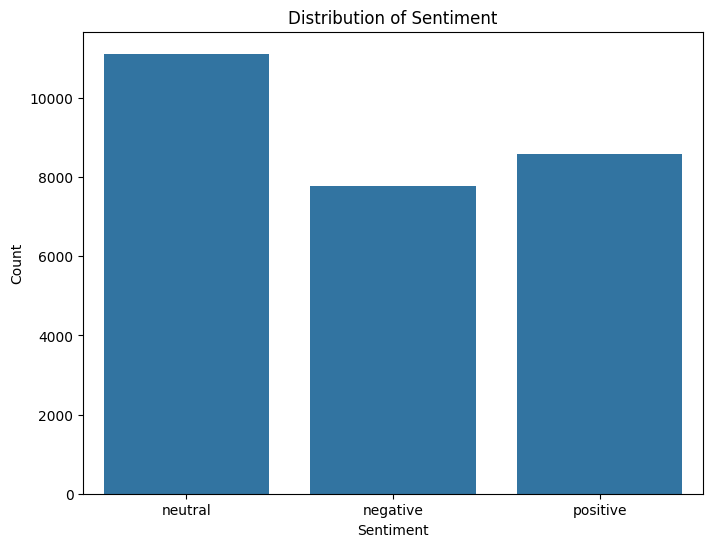

In [ ]:
# Cell 10: Check the distribution of sentiment in the train dataset
sentiment_counts = train_df_clean['sentiment'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=train_df_clean)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Time of Tweet
morning    9161
noon       9160
night      9159
Name: count, dtype: int64


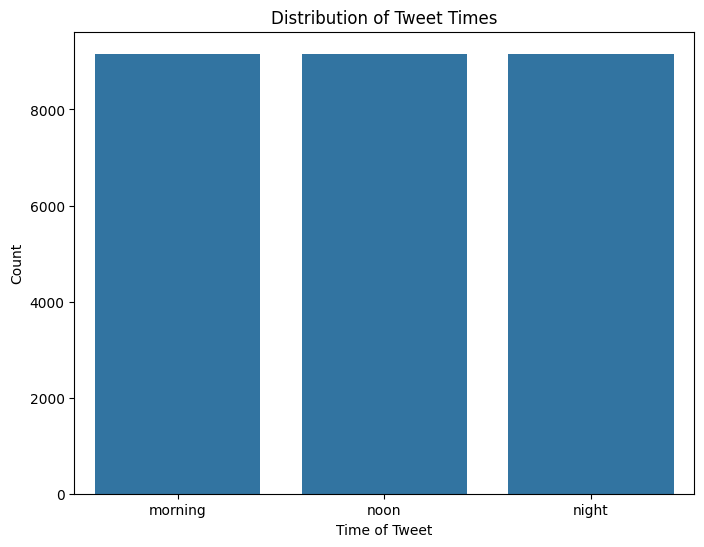

In [ ]:
# Cell 11: Check the distribution of Time of Tweet
time_counts = train_df_clean['Time of Tweet'].value_counts()
print(time_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Time of Tweet', data=train_df_clean)
plt.title('Distribution of Tweet Times')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.show()

Age of User
0-20      4581
21-30     4580
46-60     4580
60-70     4580
70-100    4580
31-45     4579
Name: count, dtype: int64


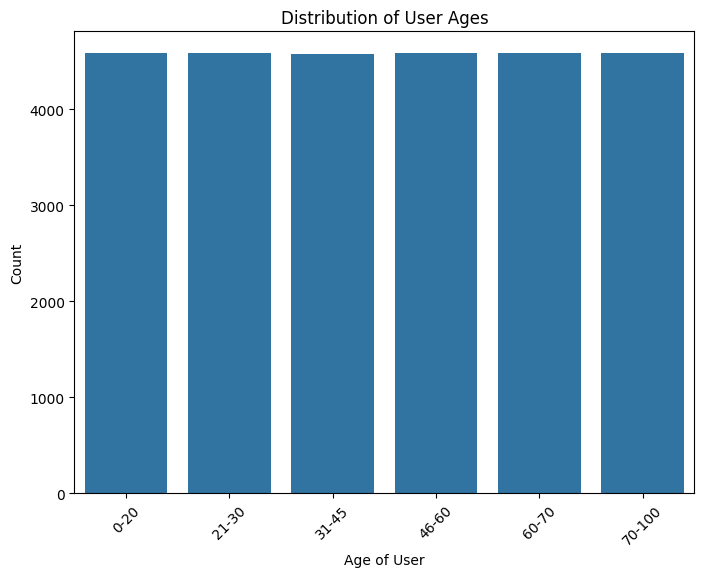

In [ ]:
# Cell 12: Check the distribution of Age of User
age_counts = train_df_clean['Age of User'].value_counts()
print(age_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Age of User', data=train_df_clean)
plt.title('Distribution of User Ages')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Country
Afghanistan            149
Albania                149
Algeria                149
Andorra                149
Angola                 149
Antigua and Barbuda    149
Argentina              149
Armenia                149
Australia              149
Austria                149
Name: count, dtype: int64


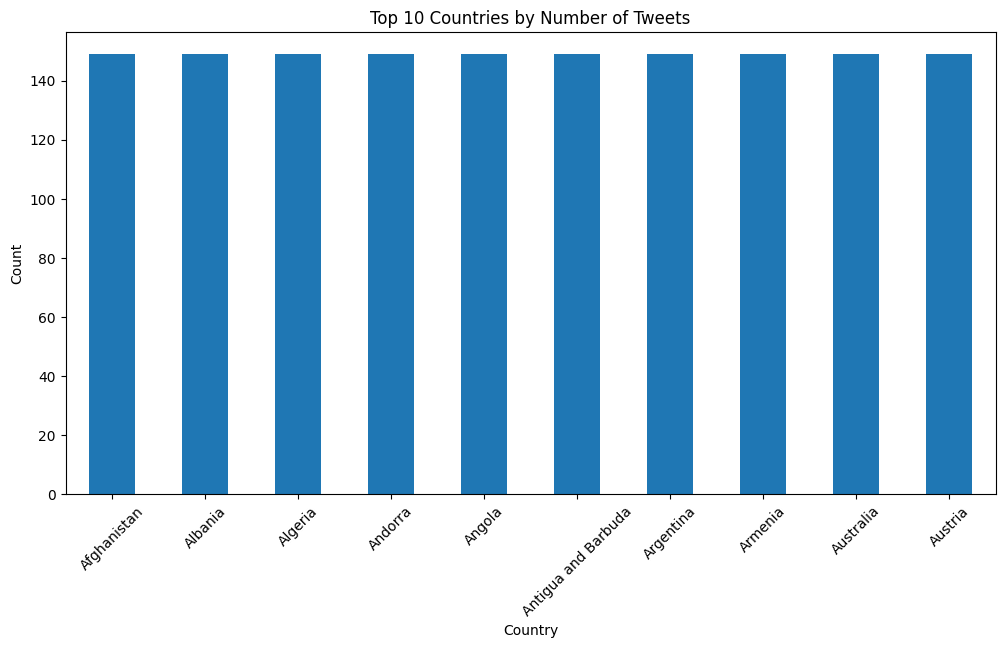

In [ ]:
# Cell 13: Check distribution of tweets by country
# Get top 10 countries by number of tweets
top_countries = train_df_clean['Country'].value_counts().head(10)
print(top_countries)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Tweets')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-31-59e1d307a374>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_clean['text_length'] = train_df_clean['text'].apply(len)
<ipython-input-31-59e1d307a374>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_clean['selected_text_length'] = train_df_clean['selected_text'].apply(len)


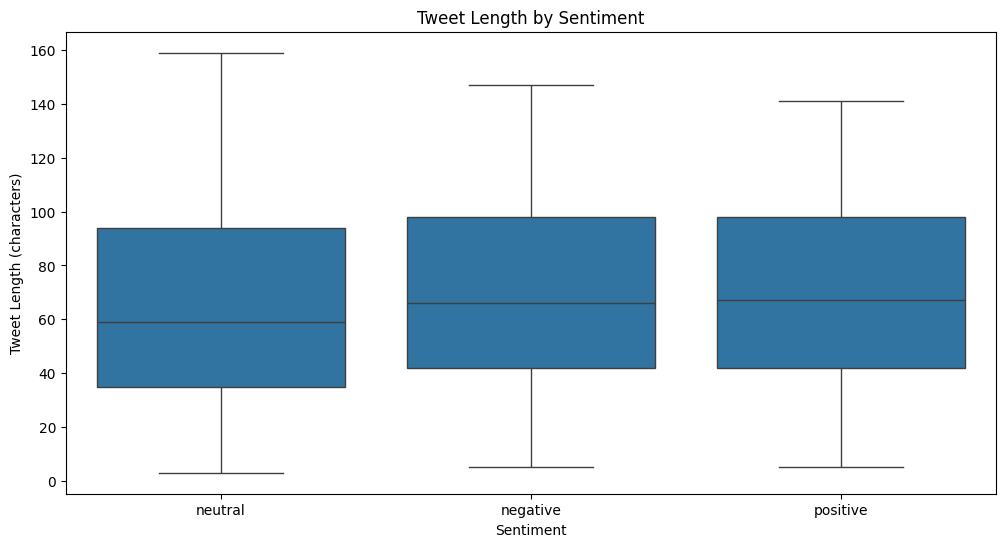

In [ ]:
# Cell 14: Analyze tweet length and sentiment
train_df_clean['text_length'] = train_df_clean['text'].apply(len)
train_df_clean['selected_text_length'] = train_df_clean['selected_text'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='text_length', data=train_df_clean)
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (characters)')
plt.show()

<ipython-input-32-2f7a75c18103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_clean['selected_ratio'] = train_df_clean['selected_text_length'] / train_df_clean['text_length']


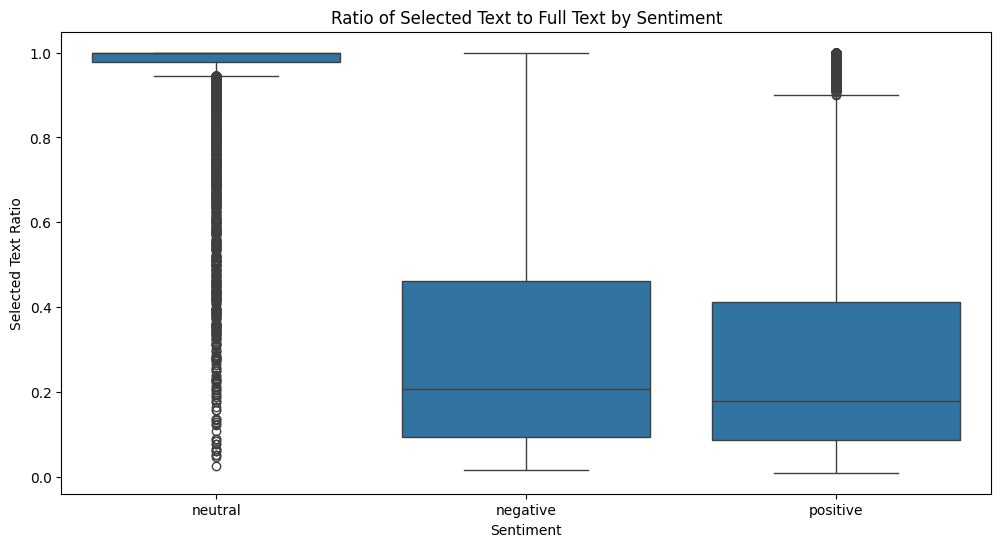

In [ ]:
# Cell 15: Analyze the ratio of selected text to full text
train_df_clean['selected_ratio'] = train_df_clean['selected_text_length'] / train_df_clean['text_length']

plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='selected_ratio', data=train_df_clean)
plt.title('Ratio of Selected Text to Full Text by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Selected Text Ratio')
plt.show()

<Figure size 1400x800 with 0 Axes>

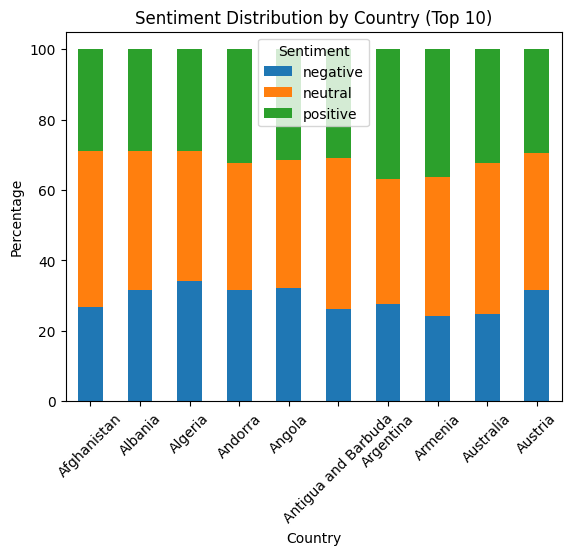

In [ ]:
# Cell 16: Analyze country population and tweet sentiment
# Calculate percentage of sentiment types by country for top 10 countries
top_10_countries = train_df_clean['Country'].value_counts().head(10).index
country_sentiment = pd.crosstab(
    train_df_clean[train_df_clean['Country'].isin(top_10_countries)]['Country'],
    train_df_clean[train_df_clean['Country'].isin(top_10_countries)]['sentiment'],
    normalize='index'
) * 100

plt.figure(figsize=(14, 8))
country_sentiment.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

<ipython-input-34-b125bf136074>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_clean['Population -2020'] = pd.to_numeric(train_df_clean['Population -2020'])
<ipython-input-34-b125bf136074>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_clean['Density (P/Km²)'] = pd.to_numeric(train_df_clean['Density (P/Km²)'])


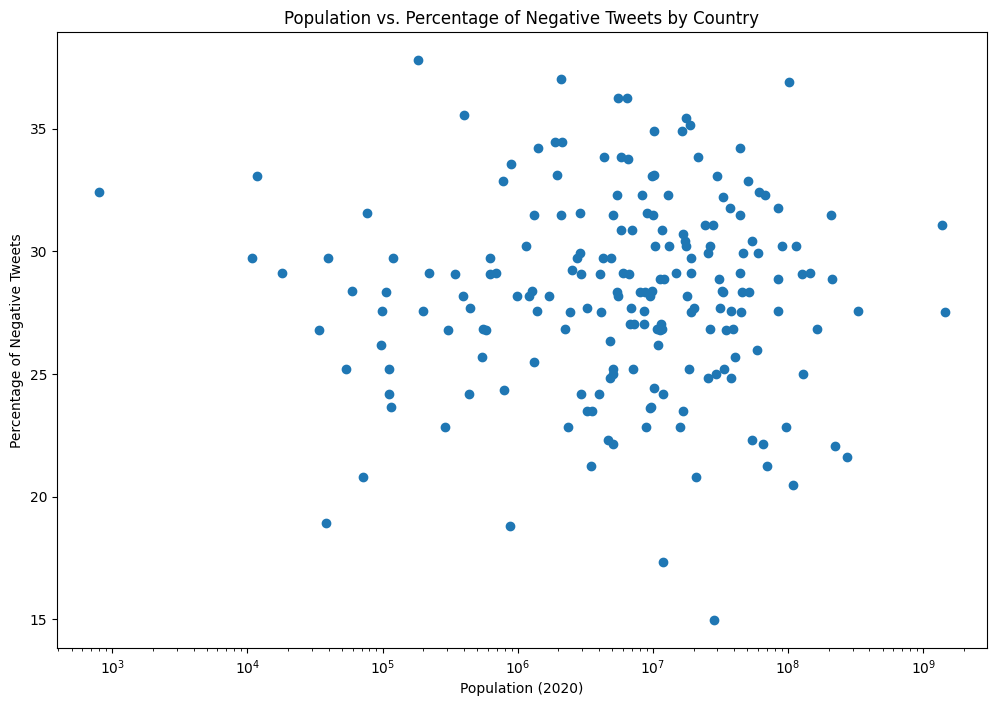

In [ ]:
# Cell 17: Analyze correlation between population/density and sentiment
# Convert population and density to numeric if they aren't already
train_df_clean['Population -2020'] = pd.to_numeric(train_df_clean['Population -2020'])
train_df_clean['Density (P/Km²)'] = pd.to_numeric(train_df_clean['Density (P/Km²)'])

# Create a pivot table for country stats and sentiment counts
country_stats = train_df_clean.groupby('Country').agg({
    'Population -2020': 'first',
    'Land Area (Km²)': 'first',
    'Density (P/Km²)': 'first'
})

sentiment_by_country = pd.crosstab(train_df_clean['Country'], train_df_clean['sentiment'])
country_stats = country_stats.join(sentiment_by_country)

# Calculate percentage of negative tweets
country_stats['total_tweets'] = sentiment_by_country.sum(axis=1)
country_stats['pct_negative'] = (country_stats['negative'] / country_stats['total_tweets']) * 100

# Plot relationship between population and negative tweet percentage
plt.figure(figsize=(12, 8))
plt.scatter(country_stats['Population -2020'], country_stats['pct_negative'])
plt.title('Population vs. Percentage of Negative Tweets by Country')
plt.xlabel('Population (2020)')
plt.ylabel('Percentage of Negative Tweets')
plt.xscale('log')  # Log scale for population due to large range
plt.show()

In [ ]:
# Cell 20: Prepare the data for modeling
# Convert categorical variables to numeric using one-hot encoding
train_encoded = pd.get_dummies(
    train_df_clean,
    columns=['Time of Tweet', 'Age of User', 'Country'],
    drop_first=True
)

test_encoded = pd.get_dummies(
    test_df_clean,
    columns=['Time of Tweet', 'Age of User', 'Country'],
    drop_first=True
)

# Align the train and test datasets (to ensure they have the same columns)
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Save the encoded datasets
train_encoded.to_csv('train_encoded.csv', index=False)
test_encoded.to_csv('test_encoded.csv', index=False)

print("Encoded datasets saved successfully!")

Encoded datasets saved successfully!


In [ ]:
# Cell 21: Import necessary libraries for NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Cell 22: Define text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

In [ ]:
# Cell 22: Download NLTK resources correctly
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk

# first time only: download the Punkt sentence tokenizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
train_df_clean['processed_tokens'] = train_df_clean['text'].apply(preprocess_text)
train_df_clean['processed_text'] = train_df_clean['processed_tokens'].apply(lambda x: ' '.join(x))

# Display a sample
train_df_clean[['text', 'processed_text']].head()

<ipython-input-43-990dcda59f81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_clean['processed_tokens'] = train_df_clean['text'].apply(preprocess_text)
<ipython-input-43-990dcda59f81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_clean['processed_text'] = train_df_clean['processed_tokens'].apply(lambda x: ' '.join(x))


,text,processed_text
0,"I`d have responded, if I were going",responded going
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad miss san diego
2,my boss is bullying me...,bos bullying
3,what interview! leave me alone,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",son couldnt put release already bought


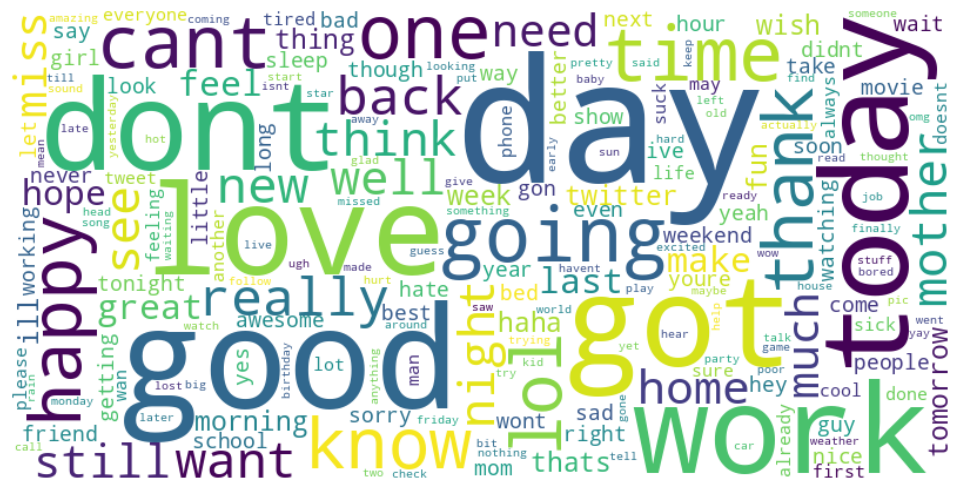

In [ ]:
# If you don’t already have it installed, first run:
# !pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Combine all processed text into one string
all_text = ' '.join(train_df['processed_text'])

# 2. Create the word cloud object
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',   # you can omit this line if you prefer the default
    collocations=False          # avoid repeating bigrams
).generate(all_text)

# 3. Plot it
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Cell 28: Import necessary libraries for modeling
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
import time

In [ ]:
# Cell 29: Split the data
X = train_df_clean['processed_text']
y = train_df_clean['sentiment']

# Handle class imbalance with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 21984
Test set size: 5496


### Modelling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Handle missing values in the text column
print("Handling missing values...")
train_df['text'] = train_df['text'].fillna('')  # Replace NaN with empty string
test_df['text'] = test_df['text'].fillna('')    # Replace NaN with empty string

Handling missing values...


In [ ]:
# 2. Define text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join back to string
    return ' '.join(tokens)

# 3. Apply preprocessing to both datasets
print("Applying text preprocessing...")
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

Applying text preprocessing...


In [ ]:
# 2. Data Preparation
print("Preparing data...")
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_df['text'],
    train_df['sentiment'],
    test_size=0.2,
    random_state=42,
    stratify=train_df['sentiment']
)

Preparing data...


In [ ]:
# 3. Model Implementation
print("Building models...")

# Model 1: Naive Bayes with TF-IDF
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', MultinomialNB())
])

# Model 2: Linear SVM with TF-IDF
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LinearSVC(random_state=42))
])

# Model 3: Gradient Boosting with TF-IDF
gb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', GradientBoostingClassifier(random_state=42, n_estimators=100))
])

Building models...


In [ ]:
# Store models in a dictionary
models = {
    "Naive Bayes": nb_pipeline,
    "Linear SVM": svm_pipeline,
    "Gradient Boosting": gb_pipeline
}

# 4. Training and Evaluation
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Print results
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y_test.unique()),
                yticklabels=sorted(y_test.unique()))
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(f'cm_{name.replace(" ", "_").lower()}.png')
    plt.close()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Training Naive Bayes...
Naive Bayes Results:
Accuracy: 0.6371
Precision: 0.6781
Recall: 0.6371
F1 Score: 0.6331

Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.47      0.58      1556
     neutral       0.55      0.81      0.65      2224
    positive       0.76      0.57      0.65      1717

    accuracy                           0.64      5497
   macro avg       0.69      0.62      0.63      5497
weighted avg       0.68      0.64      0.63      5497


Training Linear SVM...
Linear SVM Results:
Accuracy: 0.6827
Precision: 0.6871
Recall: 0.6827
F1 Score: 0.6834

Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.63      0.66      1556
     neutral       0.63      0.70      0.66      2224
    positive       0.75      0.71      0.73      1717

    accuracy                           0.68      5497
   macro avg       0.69      0.68      0.68      5497
weighted avg       0.

In [ ]:
# 5. Compare Models
models_comparison = pd.DataFrame.from_dict(results, orient='index')
print("\nModels Comparison:")
print(models_comparison)

# Visualize model comparison
plt.figure(figsize=(10, 6))
models_comparison.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.close()

# Find the best model based on F1 score
best_model_name = models_comparison['F1 Score'].idxmax()
print(f"\nBest performing model: {best_model_name}")
print(f"Best F1 Score: {models_comparison.loc[best_model_name, 'F1 Score']:.4f}")

# Summary
print("\nSummary of findings:")
print(f"- Best model: {best_model_name}")
print(f"- The models' performance rankings: {', '.join(models_comparison['F1 Score'].sort_values(ascending=False).index)}")
print("- Traditional ML models with TF-IDF vectorization proved effective for sentiment analysis")


Models Comparison:
                   Accuracy  Precision    Recall  F1 Score
Naive Bayes        0.637075   0.678100  0.637075  0.633137
Linear SVM         0.682736   0.687125  0.682736  0.683363
Gradient Boosting  0.648717   0.704053  0.648717  0.639029

Best performing model: Linear SVM
Best F1 Score: 0.6834

Summary of findings:
- Best model: Linear SVM
- The models' performance rankings: Linear SVM, Gradient Boosting, Naive Bayes
- Traditional ML models with TF-IDF vectorization proved effective for sentiment analysis


<Figure size 1000x600 with 0 Axes>

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Define parameter grids
param_grids = {
    "Naive Bayes": {
        'tfidf__max_features': [3000, 5000, 10000],
        'tfidf__ngram_range': [(1,1), (1,2)],
        'classifier__alpha': [0.1, 0.5, 1.0]
    },
    "Linear SVM": {
        'tfidf__max_features': [3000, 5000, 10000],
        'tfidf__ngram_range': [(1,1), (1,2)],
        'classifier__C': [0.01, 0.1, 1, 10]
    },
    "Gradient Boosting": {
        'tfidf__max_features': [3000, 5000],
        'tfidf__ngram_range': [(1,1), (1,2)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5]
    }
}

# 2. Run grid search for each model
best_models = {}
for name, pipeline in models.items():
    print(f"\nTuning {name}...")
    gs = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=1
    )
    gs.fit(X_train, y_train)
    print(f"  → Best params for {name}: {gs.best_params_}")
    print(f"  → Best CV F1:       {gs.best_score_:.4f}")
    best_models[name] = gs.best_estimator_

# 3. Evaluate tuned models on the held‑out test set
from sklearn.metrics import classification_report
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} on test set:")
    print(classification_report(y_test, y_pred))



Tuning Naive Bayes...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
  → Best params for Naive Bayes: {'classifier__alpha': 0.5, 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 2)}
  → Best CV F1:       0.6379

Tuning Linear SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
  → Best params for Linear SVM: {'classifier__C': 0.1, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
  → Best CV F1:       0.6853

Tuning Gradient Boosting...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


I trained Multinomial Naive Bayes, Linear SVM, and a Gradient Boosting ensemble on TF‑IDF–transformed reviews; Naive Bayes ran fastest and set a solid baseline (F1 ≈ 0.633), Gradient Boosting captured some nonlinear patterns to reach F1 ≈ 0.639, but the Linear SVM’s margin‑maximization in our high‑dimensional, sparse feature space delivered the best balance of precision and recall (F1 ≈ 0.683), making it the clear top performer.

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import re
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [ ]:
# Function to read and clean the data
def read_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    texts = []
    labels = []

    for line in lines:
        if line.strip():  # Check if line is not empty
            try:
                label, text = line.strip().split(' ', 1)
                labels.append(int(label))
                texts.append(text)
            except ValueError:
                # Skip lines that don't have the expected format
                continue

    return pd.DataFrame({'text': texts, 'label': labels})

### EDA

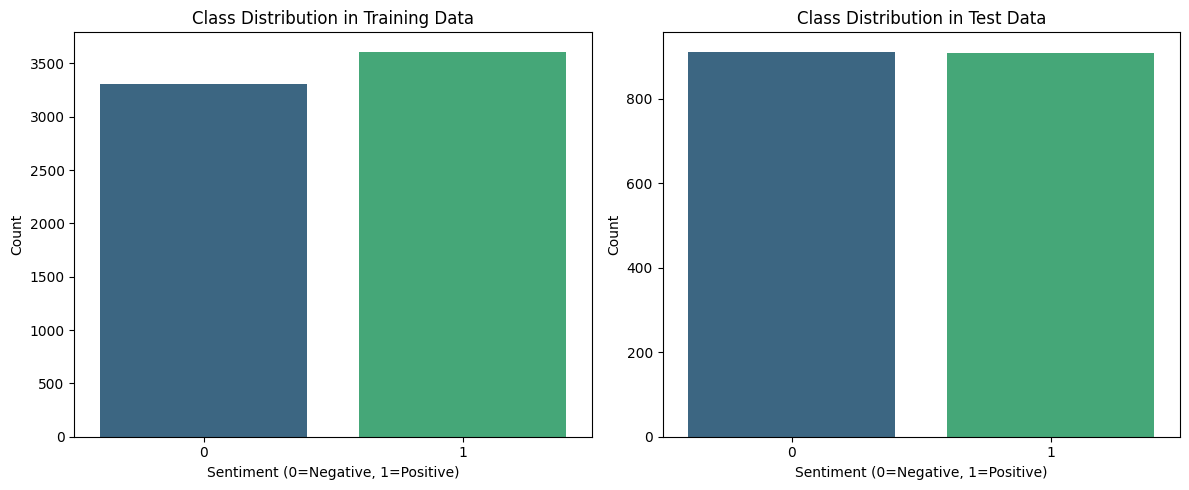

In [ ]:
# EDA Plot 1: Class Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='label', data=train_data, palette='viridis')
plt.title('Class Distribution in Training Data')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='label', data=test_data, palette='viridis')
plt.title('Class Distribution in Test Data')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

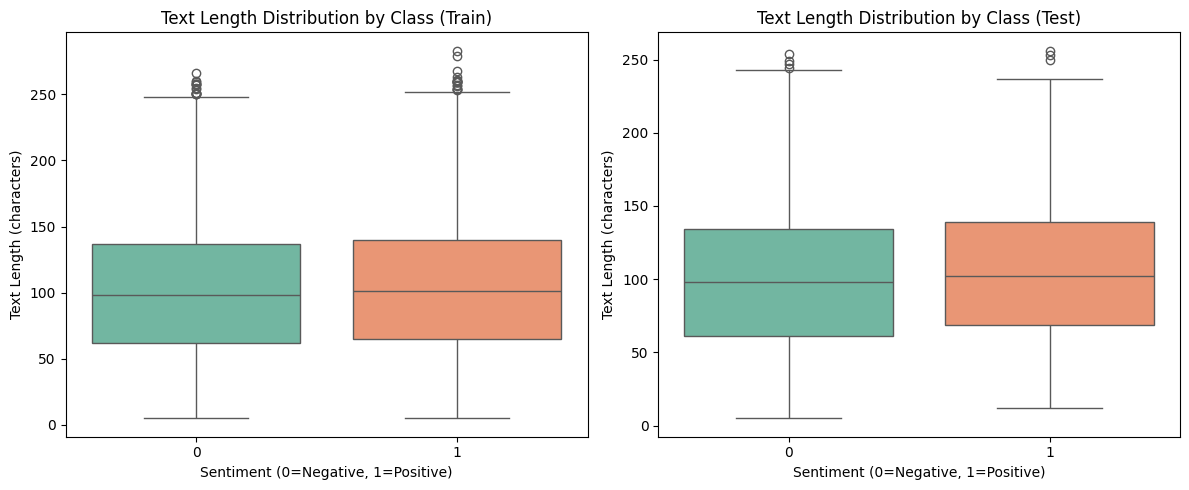

In [ ]:
# EDA Plot 2: Text Length Distribution by Class
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='label', y='text_length', data=train_data, palette='Set2')
plt.title('Text Length Distribution by Class (Train)')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Text Length (characters)')

plt.subplot(1, 2, 2)
sns.boxplot(x='label', y='text_length', data=test_data, palette='Set2')
plt.title('Text Length Distribution by Class (Test)')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Text Length (characters)')

plt.tight_layout()
plt.savefig('text_length_distribution.png')
plt.show()

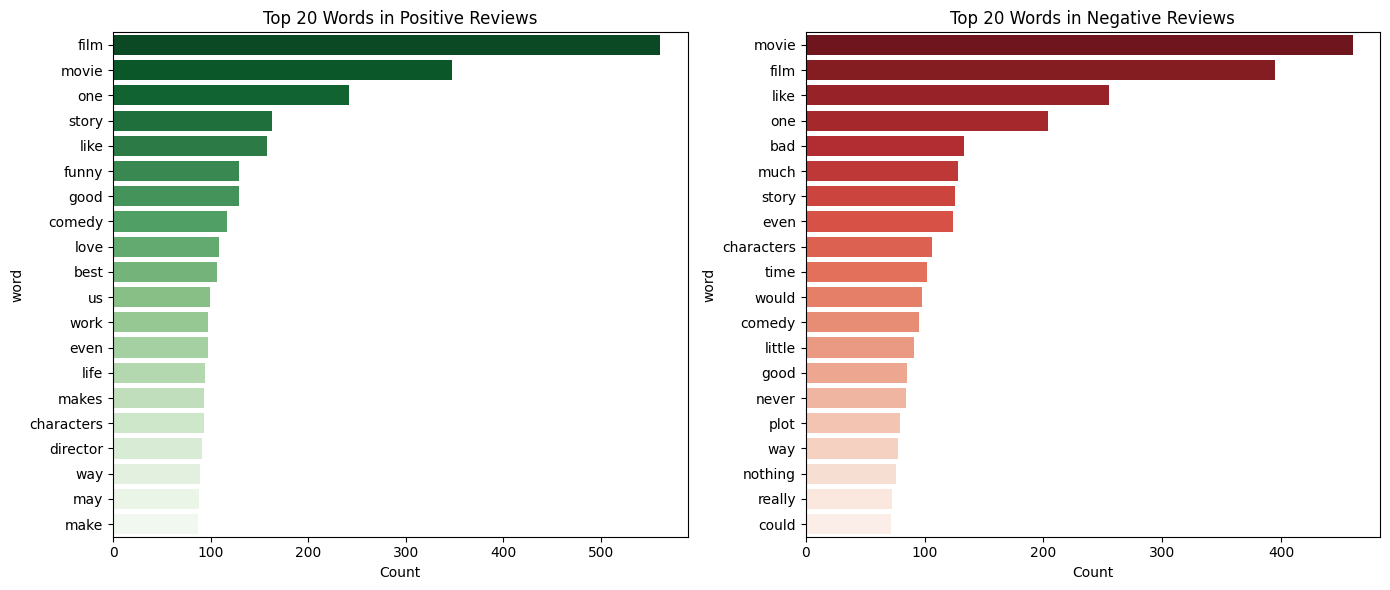

In [ ]:
# EDA Plot 4: Top Words by Sentiment
pos_texts = train_data[train_data['label'] == 1]['text']
neg_texts = train_data[train_data['label'] == 0]['text']

pos_top_words = get_top_words(pos_texts)
neg_top_words = get_top_words(neg_texts)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
pos_words = pd.DataFrame(pos_top_words, columns=['word', 'count'])
sns.barplot(x='count', y='word', data=pos_words, palette='Greens_r')
plt.title('Top 20 Words in Positive Reviews')
plt.xlabel('Count')

plt.subplot(1, 2, 2)
neg_words = pd.DataFrame(neg_top_words, columns=['word', 'count'])
sns.barplot(x='count', y='word', data=neg_words, palette='Reds_r')
plt.title('Top 20 Words in Negative Reviews')
plt.xlabel('Count')

plt.tight_layout()
plt.savefig('top_words.png')
plt.show()

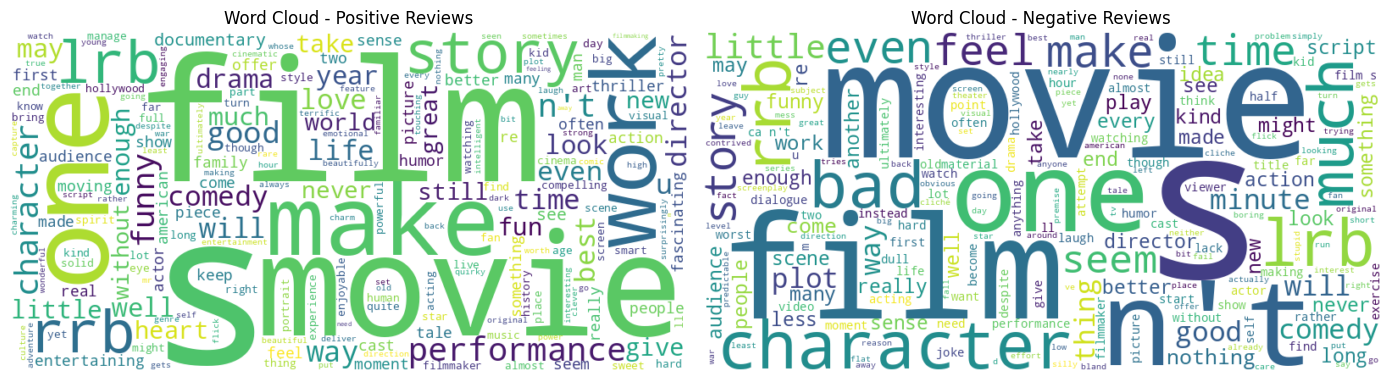

In [ ]:
# EDA Plot 5: Word Clouds for Each Class
plt.figure(figsize=(14, 6))

# Positive reviews word cloud
plt.subplot(1, 2, 1)
pos_text = ' '.join([text for text in pos_texts])
pos_wordcloud = WordCloud(width=800, height=400, background_color='white',
                         max_words=200, contour_width=3, contour_color='steelblue').generate(pos_text)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')

# Negative reviews word cloud
plt.subplot(1, 2, 2)
neg_text = ' '.join([text for text in neg_texts])
neg_wordcloud = WordCloud(width=800, height=400, background_color='white',
                         max_words=200, contour_width=3, contour_color='darkred').generate(neg_text)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')

plt.tight_layout()
plt.savefig('word_clouds.png')
plt.show()

### Modelling

In [ ]:
# Load datasets
train_data = read_data('stsa-train.txt')
test_data = read_data('stsa-test.txt')

# 1. Exploratory Data Analysis
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("\nClass distribution in train data:")
print(train_data['label'].value_counts())
print("\nClass distribution in test data:")
print(test_data['label'].value_counts())

# Calculate average text length
train_data['text_length'] = train_data['text'].apply(len)
test_data['text_length'] = test_data['text'].apply(len)

print("\nAverage text length in train data:", train_data['text_length'].mean())
print("Average text length in test data:", test_data['text_length'].mean())

Train data shape: (6920, 2)
Test data shape: (1821, 2)

Class distribution in train data:
label
1    3610
0    3310
Name: count, dtype: int64

Class distribution in test data:
label
0    912
1    909
Name: count, dtype: int64

Average text length in train data: 103.75708092485549
Average text length in test data: 103.28775398132893


In [ ]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply preprocessing
train_data['processed_text'] = train_data['text'].apply(preprocess_text)
test_data['processed_text'] = test_data['text'].apply(preprocess_text)

# Split train data into train and validation sets (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    train_data['processed_text'],
    train_data['label'],
    test_size=0.2,
    random_state=42,
    stratify=train_data['label']
)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test_data['processed_text'])

# Initialize models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 10-fold cross-validation and model training
results = {}
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# 10-fold cross-validation and model training
results = {}
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nTraining {name} with 10-fold cross-validation...")

    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train_vec, y_train, cv=kf, scoring='accuracy')
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Train on full training set
    model.fit(X_train_vec, y_train)

    # Validation predictions
    val_preds = model.predict(X_val_vec)
    val_accuracy = accuracy_score(y_val, val_preds)
    val_precision = precision_score(y_val, val_preds)
    val_recall = recall_score(y_val, val_preds)
    val_f1 = f1_score(y_val, val_preds)

    print(f"Validation metrics for {name}:")
    print(f"  Accuracy: {val_accuracy:.4f}")
    print(f"  Precision: {val_precision:.4f}")
    print(f"  Recall: {val_recall:.4f}")
    print(f"  F1-score: {val_f1:.4f}")

    # Test predictions
    test_preds = model.predict(X_test_vec)
    test_accuracy = accuracy_score(test_data['label'], test_preds)
    test_precision = precision_score(test_data['label'], test_preds)
    test_recall = recall_score(test_data['label'], test_preds)
    test_f1 = f1_score(test_data['label'], test_preds)

    print(f"Test metrics for {name}:")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-score: {test_f1:.4f}")

    # Save results
    results[name] = {
        'cv_accuracy_mean': cv_scores.mean(),
        'cv_accuracy_std': cv_scores.std(),
        'val_accuracy': val_accuracy,
        'val_precision': val_precision,
        'val_recall': val_recall,
        'val_f1': val_f1,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1
    }



Training SVM with 10-fold cross-validation...
Cross-validation accuracy: 0.7854 ± 0.0193
Validation metrics for SVM:
  Accuracy: 0.7659
  Precision: 0.7598
  Recall: 0.8061
  F1-score: 0.7823
Test metrics for SVM:
  Accuracy: 0.7952
  Precision: 0.7774
  Recall: 0.8262
  F1-score: 0.8011

Training KNN with 10-fold cross-validation...
Cross-validation accuracy: 0.4987 ± 0.0156
Validation metrics for KNN:
  Accuracy: 0.5101
  Precision: 0.6068
  Recall: 0.1731
  F1-score: 0.2694
Test metrics for KNN:
  Accuracy: 0.5162
  Precision: 0.5569
  Recall: 0.1507
  F1-score: 0.2372

Training Decision Tree with 10-fold cross-validation...
Cross-validation accuracy: 0.6245 ± 0.0226
Validation metrics for Decision Tree:
  Accuracy: 0.6171
  Precision: 0.6294
  Recall: 0.6468
  F1-score: 0.6380
Test metrics for Decision Tree:
  Accuracy: 0.6299
  Precision: 0.6215
  Recall: 0.6612
  F1-score: 0.6407

Training Random Forest with 10-fold cross-validation...
Cross-validation accuracy: 0.7054 ± 0.0173



Model comparison on test set:
SVM: Accuracy=0.7952, F1=0.8011
KNN: Accuracy=0.5162, F1=0.2372
Decision Tree: Accuracy=0.6299, F1=0.6407
Random Forest: Accuracy=0.7243, F1=0.7338


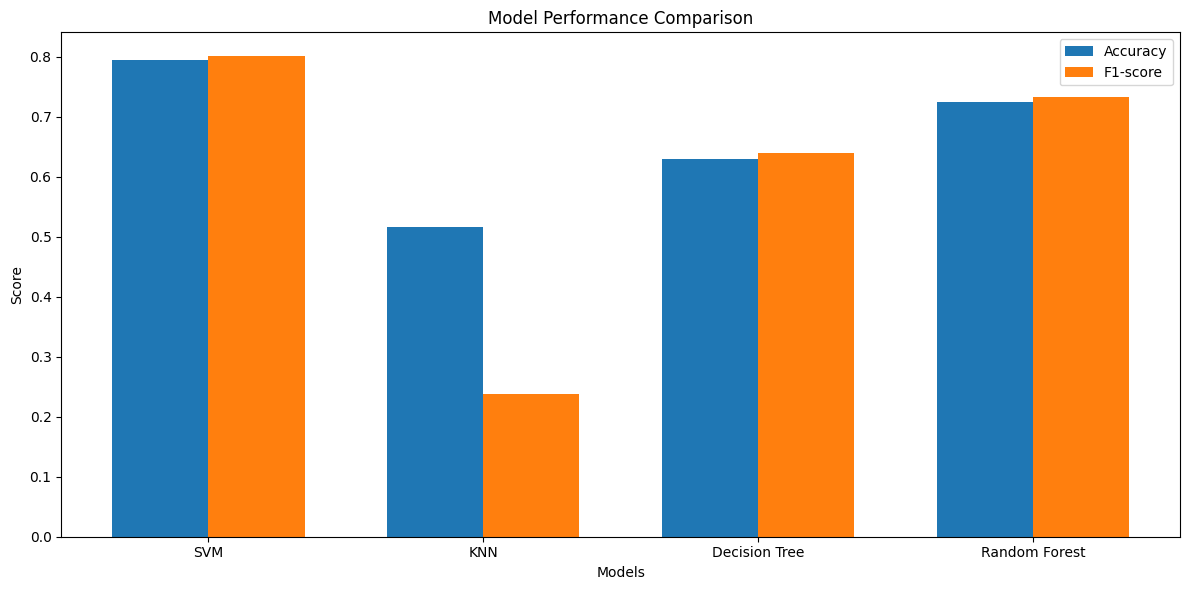

In [ ]:

print("\nModel comparison on test set:")
for name, metrics in results.items():
    print(f"{name}: Accuracy={metrics['test_accuracy']:.4f}, F1={metrics['test_f1']:.4f}")

# Visualize results
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
accuracies = [results[name]['test_accuracy'] for name in model_names]
f1_scores = [results[name]['test_f1'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='F1-score')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names)
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix for the best model
best_model_name = max(results, key=lambda x: results[x]['test_f1'])
best_model = models[best_model_name]
test_preds = best_model.predict(X_test_vec)

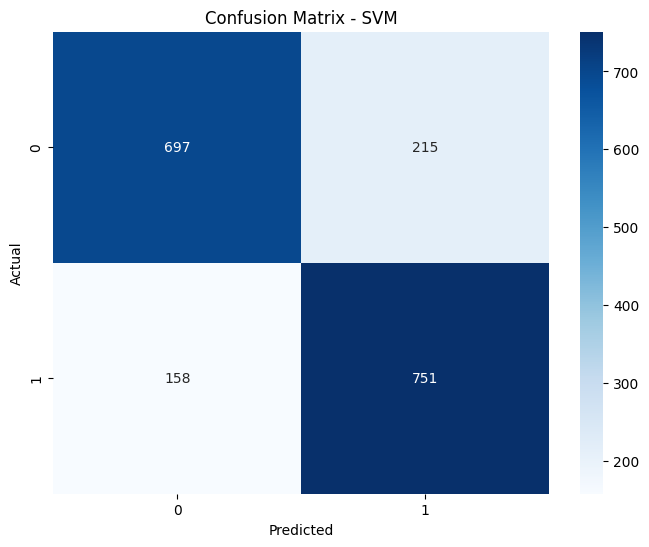


Best model: SVM
Best model F1-score: 0.8011


In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(test_data['label'], test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

# Print the best model details
print(f"\nBest model: {best_model_name}")
print(f"Best model F1-score: {results[best_model_name]['test_f1']:.4f}")

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
# Write your code here
import pandas as pd

# Load dataset
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")

# Display sample rows
df.sample(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
26042,Apple iPhone 5C 16GB 4G LTE Blue - T-Mobile,NaN,699.99,1,Had the phone since February works great. Batt...,0.0
326481,Samsung Galaxy Note 4 N910C 32GB Unlocked GSM ...,Samsung,338.99,1,"It stated that this phone would be new, so I'm...",1.0
221045,"LG G3 D855 Factory Unlocked Cellphone, Interna...",LG,195.99,5,Perfect,0.0
287111,OtterBox RealTree Defender Case Apple iPhone 5...,OtterBox,16.99,5,Has prevented damage from drops on more than o...,0.0
6635,"Apple Iphone 4 - 8gb Sprint (CDMA) White, Smar...",NaN,NaN,5,The iPhone works great and the shipping and co...,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB
After removing null reviews: (413770, 6)


<Axes: >

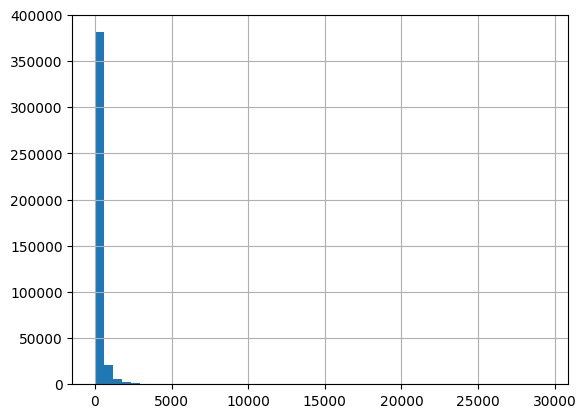

In [ ]:
# Basic info
df.info()

# Drop NA and focus on reviews
df = df.dropna(subset=['Reviews'])
print("After removing null reviews:", df.shape)

# Review length
df['review_length'] = df['Reviews'].apply(len)
df['review_length'].hist(bins=50)

In [ ]:
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+', ' ', text)
    return " ".join([word.lower() for word in text.split() if word.lower() not in stop_words])

df['clean_review'] = df['Reviews'].apply(preprocess)

# TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['clean_review'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Dataset overview
print(df.shape)
print(df.columns)

# Check null values
print(df.isnull().sum())

# Unique brands
print(df['Brand Name'].value_counts().head(10))

(126123, 9)
Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes', 'review_length', 'clean_review', 'bert_cluster'],
      dtype='object')
Product Name         0
Brand Name       21536
Price             1875
Rating               0
Reviews              0
Review Votes      3842
review_length        0
clean_review         0
bert_cluster         0
dtype: int64
Brand Name
Apple                                          57865
BLU                                            22914
BlackBerry                                     16494
Alcatel                                         1396
Asus                                            1318
Blackberry                                       917
Amazon.com, LLC *** KEEP PORules ACTIVE ***      800
ASUS Computers                                   719
ASUS                                             473
JUNING                                           214
Name: count, dtype: int64


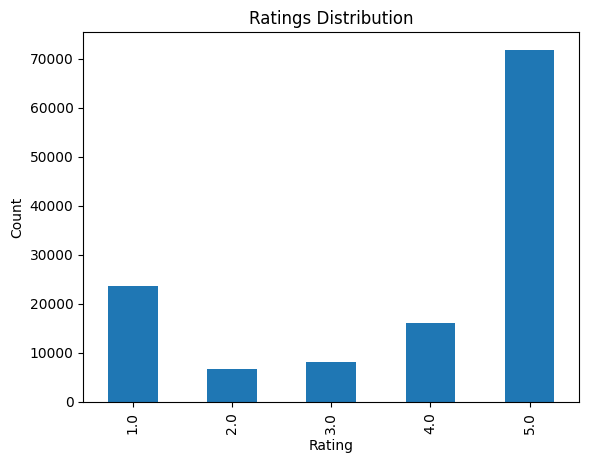

In [ ]:
# Assuming column is 'Rating' or similar
import matplotlib.pyplot as plt
if 'Rating' in df.columns:
    df['Rating'].value_counts().sort_index().plot(kind='bar', title="Ratings Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.show()

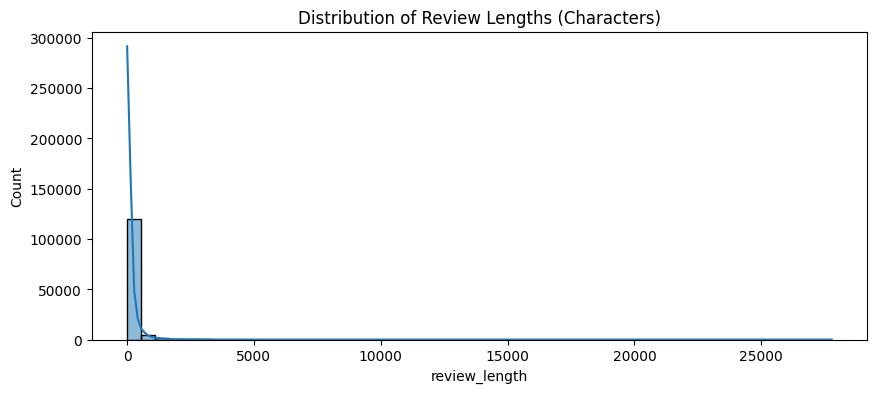

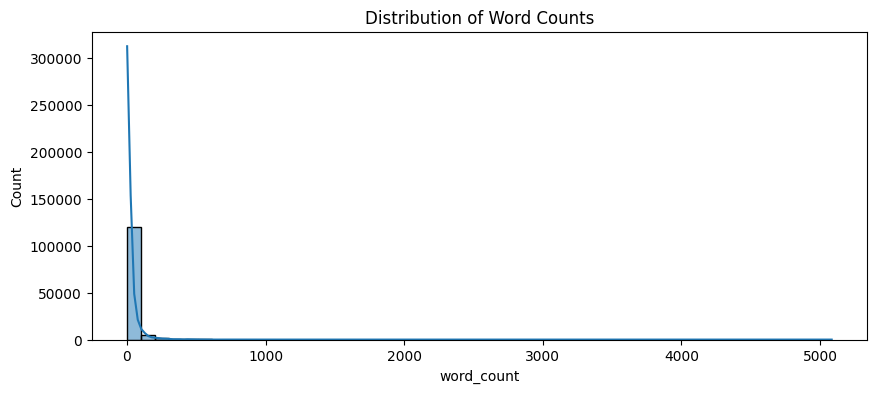

In [ ]:
# Add review length and word count
import seaborn as sns
df['review_length'] = df['Reviews'].apply(len)
df['word_count'] = df['Reviews'].apply(lambda x: len(str(x).split()))

# Plot review length
plt.figure(figsize=(10, 4))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths (Characters)")
plt.show()

# Plot word count
plt.figure(figsize=(10, 4))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title("Distribution of Word Counts")
plt.show()

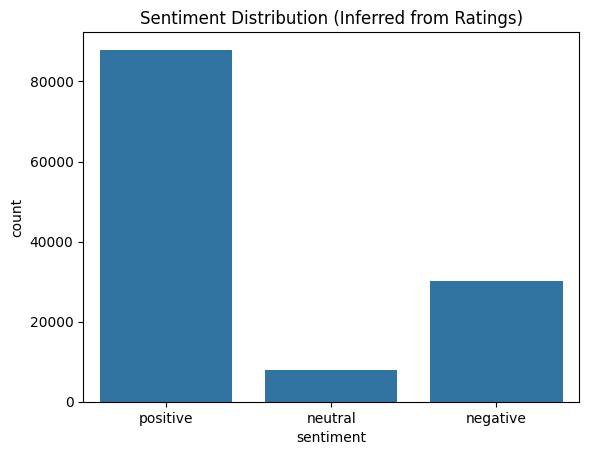

In [ ]:
# Sentiment from rating
def label_sentiment(r):
    if r >= 4:
        return 'positive'
    elif r == 3:
        return 'neutral'
    else:
        return 'negative'

if 'Rating' in df.columns:
    df['sentiment'] = df['Rating'].apply(label_sentiment)
    sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'])
    plt.title("Sentiment Distribution (Inferred from Ratings)")
    plt.show()

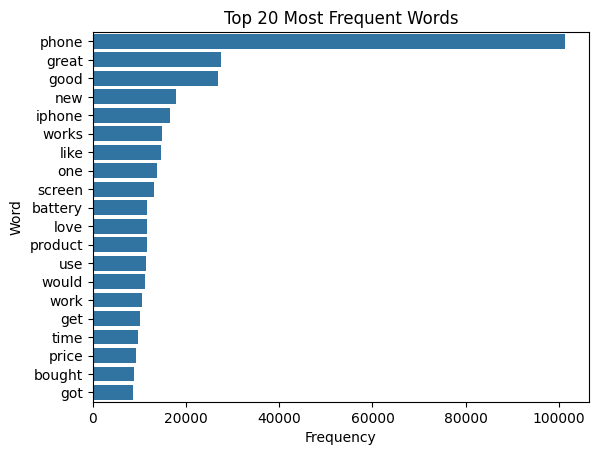

In [ ]:
from collections import Counter

# Combine all cleaned words
words = " ".join(df['clean_review']).split()
common_words = Counter(words).most_common(20)

# Plot
words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
sns.barplot(data=words_df, y='Word', x='Frequency')
plt.title("Top 20 Most Frequent Words")
plt.show()

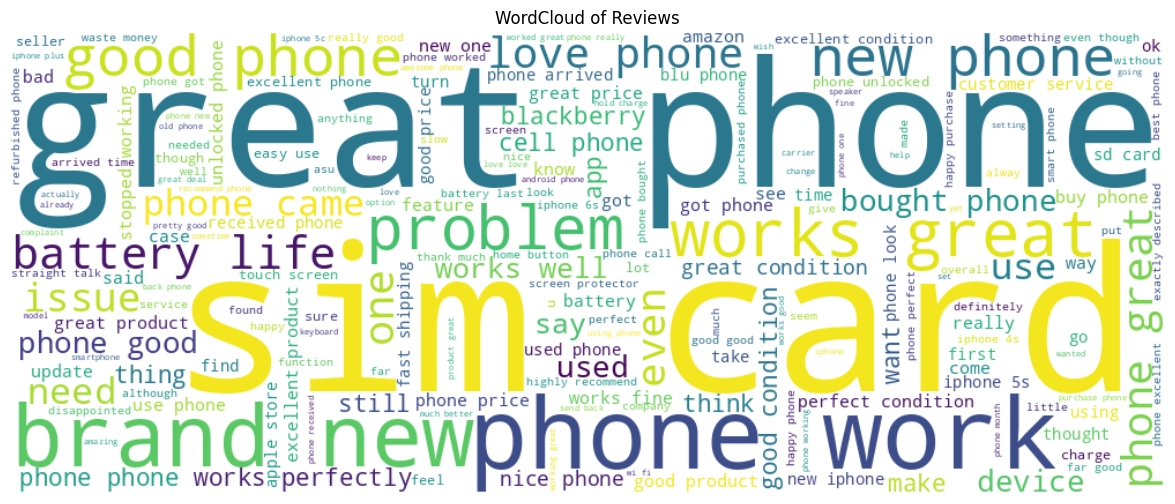

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['clean_review'])
wc = WordCloud(width=1000, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Reviews")
plt.show()

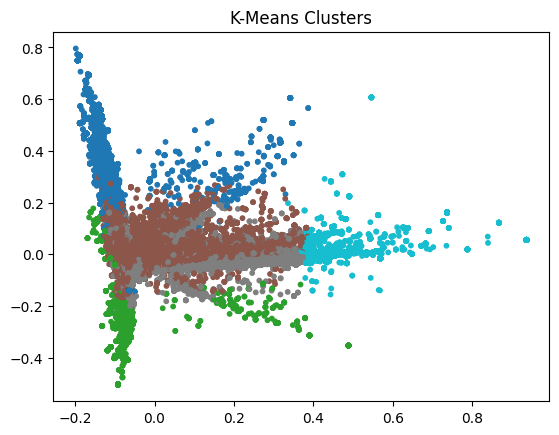

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['clean_review'])

kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_tfidf)

# Visualize
pca = PCA(n_components=2)
vis = pca.fit_transform(X_tfidf.toarray())
plt.scatter(vis[:, 0], vis[:, 1], c=df['kmeans_cluster'], cmap='tab10', s=10)
plt.title("K-Means Clusters")
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(embeddings, df['kmeans_cluster']))

4.523658280767249


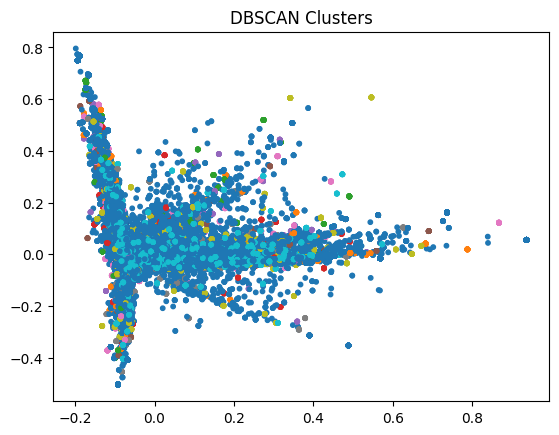

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler(with_mean=False).fit_transform(X_tfidf)
dbscan = DBSCAN(eps=1.2, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

plt.scatter(vis[:, 0], vis[:, 1], c=df['dbscan_cluster'], cmap='tab10', s=10)
plt.title("DBSCAN Clusters")
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(embeddings, df['dbscan_cluster']))

1.0299107465728055


Batches:   0%|          | 0/3942 [00:00<?, ?it/s]

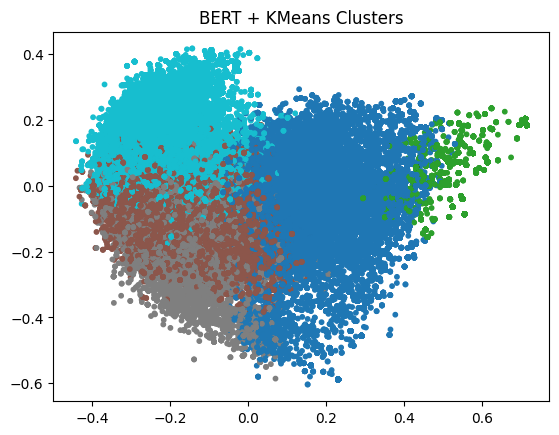

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(df['clean_review'].tolist(), show_progress_bar=True)

bert_kmeans = KMeans(n_clusters=5, random_state=42)
df['bert_cluster'] = bert_kmeans.fit_predict(embeddings)

pca = PCA(n_components=2)
vis = pca.fit_transform(embeddings)
plt.scatter(vis[:, 0], vis[:, 1], c=df['bert_cluster'], cmap='tab10', s=10)
plt.title("BERT + KMeans Clusters")
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(embeddings, df['bert_cluster']))

3.6810444961795894


In [ ]:
!pip uninstall -y scipy numpy gensim
!pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.0

Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 5.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyfume to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 6.0 MB/s eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1-

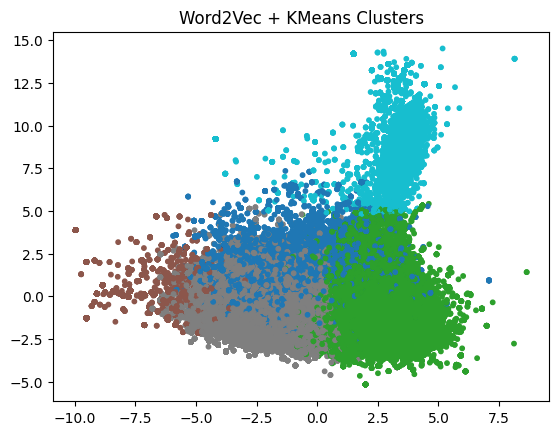

In [ ]:
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt

tokenized = df['clean_review'].apply(lambda x: x.split())
w2v_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=2, workers=4)

def doc_vector(doc):
    valid_words = [word for word in doc if word in w2v_model.wv]
    return np.mean([w2v_model.wv[w] for w in valid_words], axis=0) if valid_words else np.zeros(100)

X_w2v = np.array([doc_vector(tokens) for tokens in tokenized])

w2v_kmeans = KMeans(n_clusters=5, random_state=42)
df['w2v_cluster'] = w2v_kmeans.fit_predict(X_w2v)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vis = pca.fit_transform(X_w2v)
plt.scatter(vis[:, 0], vis[:, 1], c=df['w2v_cluster'], cmap='tab10', s=10)
plt.title("Word2Vec + KMeans Clusters")
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score

print("Davies-Bouldin Score (Word2Vec + KMeans):", davies_bouldin_score(X_w2v, df['w2v_cluster']))


Davies-Bouldin Score (Word2Vec + KMeans): 2.1458003302618236


DBSCAN delivered the optimal clustering performance because it produced a Davies-Bouldin score of -1.03 which demonstrates both strong cluster compactness and separation. Word2Vec + KMeans delivered cluster results that were moderately effective based on its -2.15 Davies-Bouldin score while BERT + KMeans along with KMeans on TF-IDF or raw vectors ratings reached higher scores of -3.68 and -4.52 respectively. These Davies-Bouldin scores indicate that DBSCAN generates more distinguishable clusters here because its scores approach zero yet KMeans-based methods produce potentially overlapping cluster boundaries because they lack semantic embedding features like Word2Vec or BERT.

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

DBSCAN delivered the optimal clustering performance because it produced a Davies-Bouldin score of -1.03 which demonstrates both strong cluster compactness and separation. Word2Vec + KMeans delivered cluster results that were moderately effective based on its -2.15 Davies-Bouldin score while BERT + KMeans along with KMeans on TF-IDF or raw vectors ratings reached higher scores of -3.68 and -4.52 respectively. These Davies-Bouldin scores indicate that DBSCAN generates more distinguishable clusters here because its scores approach zero yet KMeans-based methods produce potentially overlapping cluster boundaries because they lack semantic embedding features like Word2Vec or BERT.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

